## Directed graph symmetrization

Fitch, K. (2018). Metric preserving directed graph symmetrization, 1–16. Retrieved from http://arxiv.org/abs/1802.09829

Strongly connected, positively weighted graph.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [2]:
N = 5
g = nx.scale_free_graph(N)
while not nx.is_strongly_connected(g):
    e1 = np.random.randint(N)
    e2 = np.random.randint(N)
    g.add_edge(e1, e2)

Compute the Laplacian for the graph.

In [3]:
A = nx.adjacency_matrix(g)
D = np.diag(np.asarray(np.sum(nx.adjacency_matrix(g), axis=1)).reshape(-1))
L = D - A
np.linalg.matrix_rank(L)

4

Orthonormal basis 
$Q \in \mathbb{R}^{(N-1)\times N}$

$Q$ is the orthonormal basis of the nullspace of $\mathbf{1}_N$, i.e., $\mathcal{N}(\mathbf{1}_N)$

In [4]:
from scipy.linalg import null_space

In [5]:
Q = null_space(np.ones((N,N))).transpose()

$Q\mathbf{1}_n = \mathbf{0}$

In [6]:
np.printoptions(suppress=True)
np.sum(Q, axis=1)

array([-2.22044605e-16, -3.33066907e-16,  0.00000000e+00,  0.00000000e+00])

$QQ^T = I_{(n-1)}$

In [7]:
print(np.matmul(Q, np.transpose(Q)))

[[ 1.00000000e+00  5.91241522e-17  3.30407515e-18  9.02409675e-18]
 [ 5.91241522e-17  1.00000000e+00 -4.12931954e-16  4.66130548e-17]
 [ 3.30407515e-18 -4.12931954e-16  1.00000000e+00  6.37665793e-17]
 [ 9.02409675e-18  4.66130548e-17  6.37665793e-17  1.00000000e+00]]


Compute Reduced Laplacian

$\bar{L} = QLQ^T$

In [8]:
rL = np.matmul(Q, np.matmul(L, np.transpose(Q)))

In [9]:
rL - np.transpose(rL)

matrix([[ 0.        ,  1.29099445, -0.09128709, -3.32039154],
        [-1.29099445,  0.        , -0.35355339,  1.83711731],
        [ 0.09128709,  0.35355339,  0.        , -1.73205081],
        [ 3.32039154, -1.83711731,  1.73205081,  0.        ]])

Solve the Lyapunov equation
$\bar { L } \Sigma + \Sigma \bar { L } ^ { T } = I _ { n - 1 }$

In [10]:
from scipy.linalg import solve_lyapunov

In [11]:
sigma = solve_lyapunov(rL, np.identity(N-1))

Project from $\mathbb { R } ^ { ( n - 1 ) \times ( n - 1 ) }$ to $\mathbb { R } ^ { n \times n }$ by $X = 2 Q ^ { T } \Sigma Q$

In [12]:
x = 2*np.matmul(np.transpose(Q), np.matmul(sigma, Q))

Pseudoinverse $\hat { L } _ { u } = X ^ { + }$

In [13]:
eqL = np.linalg.pinv(x)

In [14]:
np.shape(eqL)

(5, 5)

In [15]:
np.linalg.matrix_rank(eqL)

4

Check eigenvalues of both Laplacian matrices

In [16]:
u1, s1, v1 = np.linalg.svd(L)
s1

array([1.09516888e+01, 8.44169823e+00, 6.91802304e+00, 5.19029879e+00,
       9.73844530e-16])

In [17]:
u2, s2, v2 = np.linalg.svd(eqL)
s2

array([1.05304811e+01, 7.76531715e+00, 6.72431720e+00, 4.97988455e+00,
       1.69917905e-15])

In [18]:
eqL - eqL.transpose()

array([[ 0.00000000e+00,  2.22044605e-16, -8.88178420e-16,
         2.22044605e-15, -4.21884749e-15],
       [-2.22044605e-16,  0.00000000e+00, -3.33066907e-15,
        -7.77156117e-16, -3.10862447e-15],
       [ 8.88178420e-16,  3.33066907e-15,  0.00000000e+00,
        -6.66133815e-16,  1.99840144e-15],
       [-2.22044605e-15,  7.77156117e-16,  6.66133815e-16,
         0.00000000e+00,  2.22044605e-16],
       [ 4.21884749e-15,  3.10862447e-15, -1.99840144e-15,
        -2.22044605e-16,  0.00000000e+00]])

### Comparison to the linear model

In [19]:
from scipy.integrate import solve_ivp

In [20]:
init = np.random.rand(N)
f1 = lambda t,x: np.asarray(-L.dot(x))[0]
res1 = solve_ivp(fun=f1, t_span=[0,20], y0=init)
f2 = lambda t,x: -eqL.dot(x)
res2 = solve_ivp(fun=f2, t_span=[0,20], y0=init)

In [21]:
np.mean(init)

0.4462641648895394

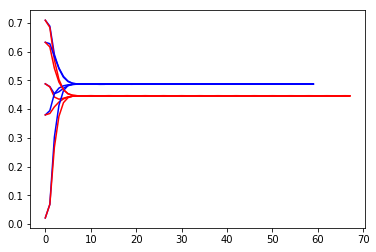

In [22]:
for i in np.arange(0,N):
    plt.plot(res1.y[i,:], color="blue")
    plt.plot(res2.y[i,:], color="red")